# Homework 4

- Execute the below code, then answer the numbered questions.

In [18]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [2]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


## Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [4]:
# insert code here
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

['condition', 'odometer', 'auction_value']
['make', 'transmission', 'state']


## Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [8]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
X_train_num = numerical_pipeline.fit_transform(X_train[numerical_features])
X_train_num

array([[ 0.81204081, -0.18762983, -0.26827129],
       [ 0.68432862, -0.47935108,  0.74349168],
       [-1.23135429,  0.8616887 , -0.74042734],
       ...,
       [ 0.55661643, -0.00260324, -0.54481983],
       [-0.33736893,  0.43391546, -0.84160364],
       [ 0.81204081,  1.36295813, -0.51783949]])

## Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [10]:
# insert code here
from sklearn.preprocessing import OneHotEncoder
#Creating a pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])
X_train_cat = categorical_pipeline.fit_transform(X_train[categorical_features])
#Getting the list of new column names after one-hot encoding
categorical_encoder = categorical_pipeline.named_steps['encoder']
categorical_encoder_cols = categorical_encoder.get_feature_names(categorical_features)
print(categorical_encoder_cols)

['make_bmw' 'make_chevrolet' 'make_chrysler' 'make_dodge' 'make_ford'
 'make_honda' 'make_hyundai' 'make_kia' 'make_nissan' 'make_toyota'
 'transmission_automatic' 'transmission_manual' 'state_az' 'state_ca'
 'state_co' 'state_fl' 'state_ga' 'state_hi' 'state_il' 'state_in'
 'state_la' 'state_ma' 'state_md' 'state_mi' 'state_mn' 'state_mo'
 'state_ms' 'state_nc' 'state_ne' 'state_nj' 'state_nm' 'state_nv'
 'state_ny' 'state_oh' 'state_or' 'state_pa' 'state_pr' 'state_sc'
 'state_tn' 'state_tx' 'state_ut' 'state_va' 'state_wa' 'state_wi']


C:\Users\SAI SWETHA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [16]:
# insert code here
from sklearn.compose import ColumnTransformer
# combine the numerical and categorical pipelines
comb = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# fit and transform the training data
X_train_processed = comb.fit_transform(X_train)

In [19]:
print(np.isnan(X_train_processed).sum())
X_train_processed

0


array([[ 0.81204081, -0.18762983, -0.26827129, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.68432862, -0.47935108,  0.74349168, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23135429,  0.8616887 , -0.74042734, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.55661643, -0.00260324, -0.54481983, ...,  0.        ,
         0.        ,  0.        ],
       [-0.33736893,  0.43391546, -0.84160364, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81204081,  1.36295813, -0.51783949, ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
print(f'Processed data has {X_train_processed.shape[1]} columns')

Processed data has 47 columns


## Question 5: Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [23]:
# insert code here
from sklearn.linear_model import LinearRegression
pipeline = Pipeline([
    ('preprocessor', comb),
    ('linear_regression', LinearRegression())
])
# fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'auction_value']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='

In [28]:
r_square = pipeline.score(X_test, y_test)
r_square

0.883827442491126

## Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

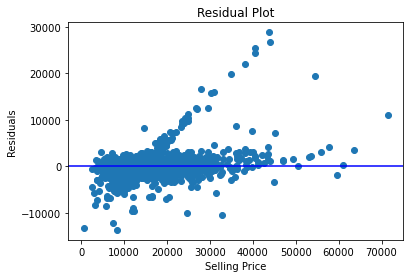

In [31]:
# insert code here
import matplotlib.pyplot as plt

# predict selling price using the test data
y_pred = pipeline.predict(X_test)
residuals = y_test - y_pred

# ploting the residuals
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='b', linestyle='-')
plt.xlabel('Selling Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The disparity between the expected and real selling rates is represented by the residual plot. The residuals should be randomly dispersed around the horizontal line at 0 if the model is fitting well and catching all the significant characteristics. The algorithm might be missing some crucial details, though, if there are trends in the residuals.

There are some trends in the residuals, as can be seen by examining the residual map for our model. In particular, the residuals exhibit a small curvature as we progress from low selling prices to high selling prices, which may be a sign that the model is missing some non-linear connections between the features and the target variable. This implies that in order to account for these non-linearities, we might want to think about either using a different model entirely or including some non-linear factors in the current one.

## Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [32]:
from sklearn.linear_model import Ridge
pipeline = Pipeline([
    ('preprocessor', comb),
    ('ridge_regression', Ridge(alpha=100))
])

# fit the pipeline to the training data
pipeline.fit(X_train, y_train)
r_square= pipeline.score(X_test, y_test)
r_square

0.8838818430874077

There is a slight change in the R^2 value. This indicates that, at the expense of a marginally worse fit to the training data, the ridge regression model with an alpha value of 100 improves generalization while decreasing overfitting.